### Data import

In [1]:
import pandas as pd

train_data = pd.read_csv('train.csv',delimiter=',')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Data Plots

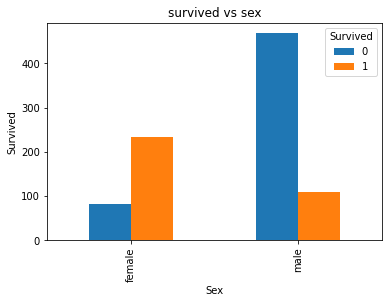

In [4]:
import matplotlib.pyplot as plt 

%matplotlib inline
pd.crosstab(train_data.Sex,train_data.Survived).plot(kind='bar')
plt.title('survived vs sex')
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.savefig('sur_sex')

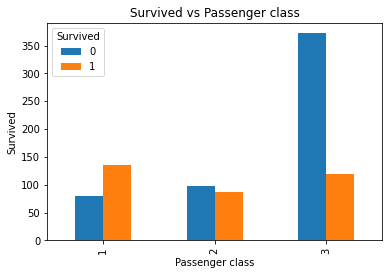

In [5]:
pd.crosstab(train_data.Pclass,train_data.Survived).plot(kind='bar')
plt.title('Survived vs Passenger class')
plt.xlabel('Passenger class')
plt.ylabel('Survived')
plt.savefig('sur_pclass')

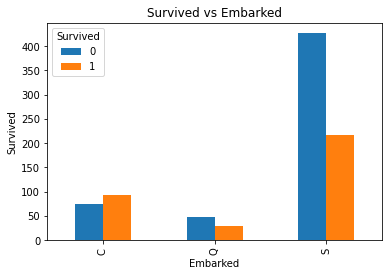

In [6]:
pd.crosstab(train_data.Embarked,train_data.Survived).plot(kind='bar')
plt.title('Survived vs Embarked')
plt.xlabel('Embarked')
plt.ylabel('Survived')
plt.savefig('sur_emb')

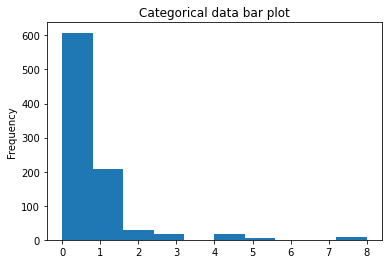

In [7]:
train_data['SibSp'].plot(kind='hist',title='Categorical data bar plot',xlabel='Sex',ylabel='count')

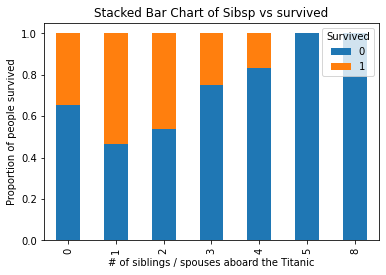

In [8]:
table=pd.crosstab(train_data.SibSp,train_data.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Sibsp vs survived')
plt.xlabel('# of siblings / spouses aboard the Titanic')
plt.ylabel('Proportion of people survived')
plt.savefig('sibsp')

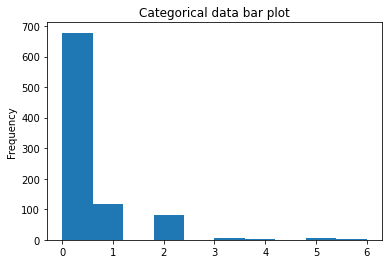

In [9]:
train_data['Parch'].plot(kind='hist',title='Categorical data bar plot',xlabel='Sex',ylabel='count')

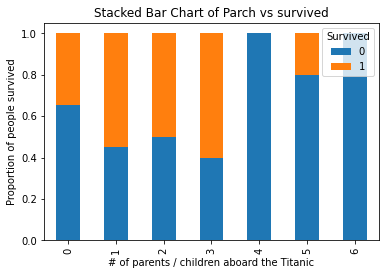

In [10]:
table=pd.crosstab(train_data.Parch,train_data.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Parch vs survived')
plt.xlabel('# of parents / children aboard the Titanic')
plt.ylabel('Proportion of people survived')
plt.savefig('Parch')

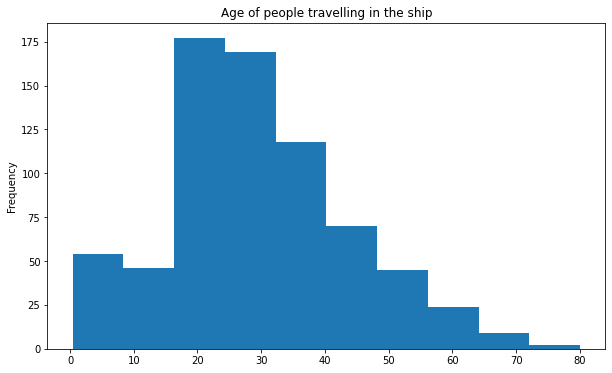

In [11]:
train_data['Age'].plot(kind='hist', figsize=(10,6), title='Age of people travelling in the ship',xlabel='Age')

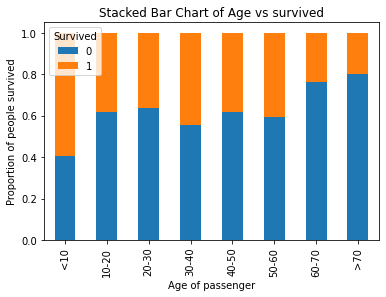

In [12]:
bins = [0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0,150.0]
labels = ['<10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '>70']

table=pd.crosstab(pd.cut(train_data['Age'], bins=bins, labels=labels),train_data.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Age vs survived')
plt.xlabel('Age of passenger')
plt.ylabel('Proportion of people survived')
plt.savefig('age')

/home/ilan/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


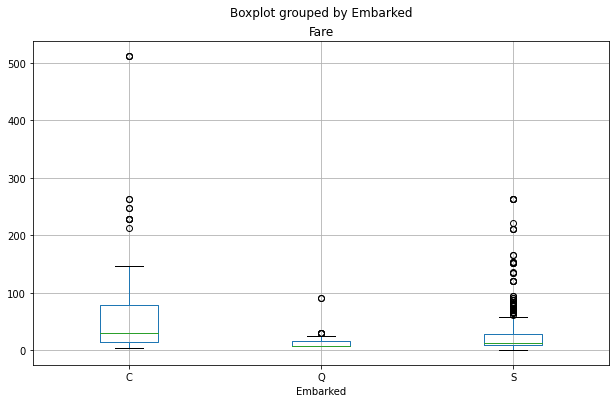

In [13]:
train_data.boxplot(column='Fare', by='Embarked', figsize=(10,6))

In [14]:
# number of unique elements in ticket column
train_data.Ticket.nunique()

681

### Data pre-processing

In [15]:
# checking correlation between numerical columns
corr = train_data[['Age','SibSp','Parch','Fare']].corr()
corr.style.background_gradient(cmap='coolwarm',)

,Age,SibSp,Parch,Fare
Age,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.308247,1.000000,0.414838,0.159651
Parch,-0.189119,0.414838,1.000000,0.216225
Fare,0.096067,0.159651,0.216225,1.000000


In [16]:
pd.crosstab(train_data['Survived'], train_data['Pclass']) 

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [17]:
pd.crosstab(train_data['Survived'], train_data['Sex']) 

Sex,female,male
Survived,,
0,81,468
1,233,109


In [18]:
pd.crosstab(train_data['Survived'], train_data['Embarked']) 

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [19]:
from scipy.stats import chi2_contingency#Testing the relationship

cat_cols = ['Pclass','Sex','Embarked']
#chi_res = chi2_contingency(pd.crosstab(loan['Loan_Status'], loan['Gender']))
#print('Chi2 Statistic: {}, p-value: {}'.format(chi_res[0], chi_res[1]))

import itertools
comb = itertools.combinations(cat_cols, 2)
comb = list(comb)
for i in comb:
    chi_res = chi2_contingency(pd.crosstab(train_data[i[0]].astype('object',copy=True,errors='ignore'),train_data[i[1]].astype('object',copy=True,errors='ignore')))
    print(i[0]+' - '+i[1]+' p-value = '+str(chi_res[1]))

Pclass - Sex p-value = 0.00020638864348233114
Pclass - Embarked p-value = 8.435267819894384e-26
Sex - Embarked p-value = 0.0012585245232290144


### Pre-processing pipeline

In [152]:
# preprocessing
from sklearn.impute import SimpleImputer
import numpy as np

def preprocessing(data,drop_cols,numeric_cols,categorical_cols):
    # drop unwanted columns
    df = data.copy()
    df = df.drop(drop_cols,axis=1)
    
    # Impute missing values
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col],errors='coerce')
    for col in categorical_cols:
        df[col] = df[col].astype('object',copy=True,errors='ignore')
    
    imputer_num = SimpleImputer(strategy ='mean')
    imputer_cat = SimpleImputer(strategy='most_frequent')

    imputer_num = imputer_num.fit(df[numeric_cols])
    imputer_cat = imputer_cat.fit(df[categorical_cols]) 

    df[numeric_cols] = imputer_num.transform(df[numeric_cols])
    df[categorical_cols] = imputer_cat.transform(df[categorical_cols])
    
    df['Fare'] = df['Fare']/ (train_data.describe()['Fare']['max'])
    df['Age'] = df['Age']/ (train_data.describe()['Age']['max'])
    
    # Onehotencode categorical columns
    df = pd.get_dummies(df, columns = categorical_cols)
    return df

In [153]:
drop_cols = ['Name','Cabin','PassengerId','Ticket']
numeric_cols = ['Age','SibSp','Parch','Fare']
categorical_cols = ['Pclass','Sex','Embarked']

In [154]:
data = preprocessing(train_data,drop_cols,numeric_cols,categorical_cols)

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    float64
 3   Parch       891 non-null    float64
 4   Fare        891 non-null    float64
 5   Pclass_1    891 non-null    uint8  
 6   Pclass_2    891 non-null    uint8  
 7   Pclass_3    891 non-null    uint8  
 8   Sex_female  891 non-null    uint8  
 9   Sex_male    891 non-null    uint8  
 10  Embarked_C  891 non-null    uint8  
 11  Embarked_Q  891 non-null    uint8  
 12  Embarked_S  891 non-null    uint8  
dtypes: float64(4), int64(1), uint8(8)
memory usage: 41.9 KB


In [156]:
data.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0.2750,1.0,0.0,0.014151,0,0,1,0,1,0,0,1
1,1,0.4750,1.0,0.0,0.139136,1,0,0,1,0,1,0,0
2,1,0.3250,0.0,0.0,0.015469,0,0,1,1,0,0,0,1
3,1,0.4375,1.0,0.0,0.103644,1,0,0,1,0,0,0,1
4,0,0.4375,0.0,0.0,0.015713,0,0,1,0,1,0,0,1


### Logistic Regression Model

In [187]:
# train test split
from sklearn.model_selection import train_test_split

X = data.drop('Survived',axis=1)
y = data['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=193,stratify=y)

In [188]:
#from imblearn.over_sampling import SMOTE

#sm = SMOTE(random_state = 2)
##clf = LogisticRegression(verbose=1,max_iter=200,solver='liblinear')
#clf.fit(X_train_res, y_train_res)

In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = LogisticRegression(verbose=1,max_iter=200,solver='liblinear')
clf.fit(X_train, y_train)

[LibLinear]

LogisticRegression(max_iter=200, solver='liblinear', verbose=1)

In [190]:
print (clf.score(X_train, y_train))

0.8002496878901373


In [191]:
y_pred = clf.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.87


In [192]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[53  2]
 [10 25]]


In [193]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90        55
           1       0.93      0.71      0.81        35

    accuracy                           0.87        90
   macro avg       0.88      0.84      0.85        90
weighted avg       0.87      0.87      0.86        90



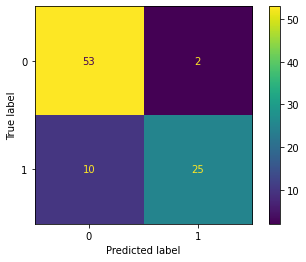

In [179]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test)  

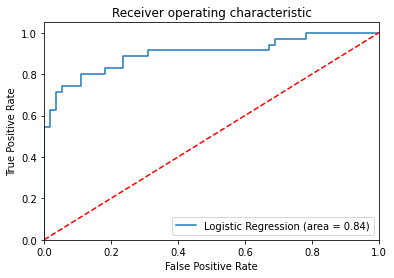

In [180]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 

logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Predictions for given test data

In [50]:
import pandas as pd

test_data = pd.read_csv('test.csv',delimiter=',')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [51]:
drop_cols = ['Name','Cabin','PassengerId','Ticket']
numeric_cols = ['Age','SibSp','Parch','Fare']
categorical_cols = ['Pclass','Sex','Embarked']

In [52]:
# preprocessing and model prediction
X_predict = preprocessing(test_data,drop_cols,numeric_cols,categorical_cols)
predicted = clf.predict(X_predict)

In [53]:
test_data['survival_predicted'] = pd.DataFrame(data = predicted,columns=['survival_prediction'])

In [54]:
test_data.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,survival_predicted
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


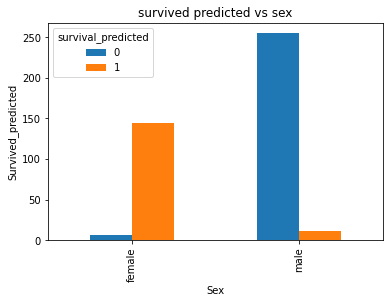

In [55]:
pd.crosstab(test_data.Sex,test_data.survival_predicted).plot(kind='bar')
plt.title('survived predicted vs sex')
plt.xlabel('Sex')
plt.ylabel('Survived_predicted')
plt.savefig('psur_sex')

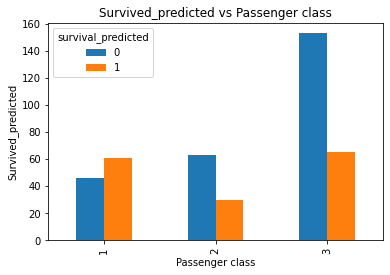

In [56]:
pd.crosstab(test_data.Pclass,test_data.survival_predicted).plot(kind='bar')
plt.title('Survived_predicted vs Passenger class')
plt.xlabel('Passenger class')
plt.ylabel('Survived_predicted')
plt.savefig('psur_pclass')

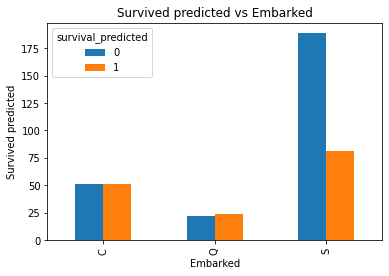

In [57]:
pd.crosstab(test_data.Embarked,test_data.survival_predicted).plot(kind='bar')
plt.title('Survived predicted vs Embarked')
plt.xlabel('Embarked')
plt.ylabel('Survived predicted')
plt.savefig('psur_emb')

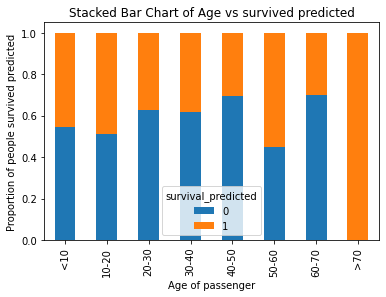

In [58]:
bins = [0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0,150.0]
labels = ['<10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '>70']

table=pd.crosstab(pd.cut(test_data['Age'], bins=bins, labels=labels),test_data.survival_predicted)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Age vs survived predicted')
plt.xlabel('Age of passenger')
plt.ylabel('Proportion of people survived predicted')
plt.savefig('page')